In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Mental.csv to Mental (1).csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Mental.csv']))
data

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,15-12-2021 13:18,shwetank1921@gmail.com,Kumar shwetank,Male,Yes,Unemployed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,4.0,43,Yes
154,15-12-2021 15:17,shukla.anu23@gmail.com,Anurag Shukla,Male,Yes,Employed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,2-5 hours,1.0,Yes,Often,1.0,5.0,34,No
155,15-12-2021 21:52,anshikagrawal1@gmail.com,Anshika,Prefer not to say,No,Self-Employed,Tier 3 (Other cities/towns),Depressed,No,Yes,...,Yes,No,More than 10 hours,5.0,Yes,Very often,5.0,5.0,45,Yes
156,16-12-2021 09:36,mrubaiskhanji1998@gmail.com,Mohd. Ubais Khan,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,Maybe,No,...,Maybe,Maybe,2-5 hours,5.0,Not sure,Never,5.0,5.0,40,Yes


In [6]:
data.isna().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [7]:
data.isna().mean()

Timestamp                                                                                                               0.000000
Email address                                                                                                           0.000000
Name                                                                                                                    0.000000
Gender                                                                                                                  0.000000
Are you above 30 years of age?                                                                                          0.000000
Employment Status                                                                                                       0.000000
City                                                                                                                    0.000000
How are you feeling today?                                                                       

In [8]:
data['How comfortable are you in talking about your mental health?'].unique()

array([nan,  1.,  4.,  2.,  5.,  3.])

In [9]:
data['How comfortable are you in talking about your mental health?'].unique()

array([nan,  1.,  4.,  2.,  5.,  3.])

In [10]:
data['How comfortable are you in talking about your mental health?'].mode()

0    5.0
dtype: float64

In [11]:
data['How comfortable are you in talking about your mental health?']=data['How comfortable are you in talking about your mental health?'].fillna(5.0)

In [12]:
data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [13]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [14]:
data['How often do you get offended or angry or start crying ?'].mode()

0    Sometimes
dtype: object

In [15]:
data['How often do you get offended or angry or start crying ?']=data['How often do you get offended or angry or start crying ?'].fillna('Sometimes')

In [16]:
data['Has the COVID-19 pandemic affected your mental well being?'].mode()

0    Yes
dtype: object

In [17]:
data['Has the COVID-19 pandemic affected your mental well being?']=data['Has the COVID-19 pandemic affected your mental well being?'].fillna('Yes')

In [18]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].mode()

0    1.0
dtype: float64

In [19]:
data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?']=data['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].fillna(1.0)

In [20]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].mode()

0    2-5 hours
dtype: object

In [21]:
data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?']=data['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].fillna('2-5 hours')

In [22]:
data['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [23]:
data['How likely do you feel yourself vulnerable or lonely?']=data['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [24]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].mode()

0    No
dtype: object

In [25]:
data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?']=data['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].fillna('No')

In [26]:
data['Have you taken any therapy or medication in the near past for mental health?'].mode()

0    No
dtype: object

In [27]:
data['Have you taken any therapy or medication in the near past for mental health?']=data['Have you taken any therapy or medication in the near past for mental health?'].fillna('No')

In [28]:
data['(If sad)have you been in the same mental state for the past few days?'].mode()

0    No
dtype: object

In [29]:
data['(If sad)have you been in the same mental state for the past few days?']=data['(If sad)have you been in the same mental state for the past few days?'].fillna('No')

In [30]:
data=data.drop(['Timestamp','Email address','Name','Employment Status','Prediction'],axis=1)

In [31]:
data=data.drop(['City'],axis=1)

In [32]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 3,
 'Are you above 30 years of age?': 2,
 'How are you feeling today?': 4,
 'eating and sleeping': 3,
 '(If sad)have you been in the same mental state for the past few days?': 3,
 'Is your sadness momentarily or has it been constant for a long time?': 4,
 'At what time of the day are you extremely low?': 3,
 'Has there been a sudden and huge change in your life?': 3,
 'Your stress is related to which of the following areas?': 19,
 'How frequently have you had little pleasure or interest in the activities you usually enjoy?': 4,
 'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.': 4,
 'How frequently have you been doing things that mean something to you or your life?': 4,
 'If you have a mental health condition, do you feel that it interferes with your work?': 3,
 'How easy is it for you to take medical leave for a mental health condition?': 4,
 'How often do you make use of substance abuse(e.g. smoking, alcohol)?': 4,
 'Have you ta

In [33]:
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female', 'Male', 'Prefer not to say'],
 'Are you above 30 years of age?': ['No', 'Yes'],
 'How are you feeling today?': ['Fine', 'Good', 'Sad', 'Depressed'],
 'eating and sleeping': ['Yes', 'No', 'Maybe'],
 '(If sad)have you been in the same mental state for the past few days?': ['No',
  'Yes',
  'Maybe'],
 'Is your sadness momentarily or has it been constant for a long time?': ['For some time',
  'Significant time',
  'Not sad',
  'Long time'],
 'At what time of the day are you extremely low?': ['Evening',
  'Morning',
  'Afternoon'],
 'Has there been a sudden and huge change in your life?': ['No',
  'Yes',
  'Not sure'],
 'Your stress is related to which of the following areas?': ['Personal',
  'Home, Work, Personal',
  'None',
  'Work',
  'Work, Personal',
  'Home, Work, Financial, Personal',
  'Financial, Personal',
  'Home, Work',
  'Home, Financial, Personal',
  'Home, Personal',
  'Work, Financial, Personal',
  'Home',
  'Financial',
  'Work, Financial',
  'Home, Wo

In [34]:
{column:len(data[column].unique()) for column in data.select_dtypes('float64').columns}

{'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?': 5,
 'How likely do you feel yourself vulnerable or lonely?': 5,
 'How comfortable are you in talking about your mental health?': 5}

In [35]:
{column:len(data[column].unique()) for column in data.select_dtypes('int64').columns}

{'How confident you have been feeling in your capabilities recently.': 5}

In [36]:
{column:len(data[column].unique()) for column in data.select_dtypes('bool').columns}

{}

In [37]:
def encode_gender(x):
    if x=='Female':
        return 0
    elif x=='Male':
        return 1
    else:
        return 2

In [38]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [39]:
target='Prediction_status'
binary_features=[
    'Are you above 30 years of age?'
]
ordinal_features=[
    'How are you feeling today?',
    'Is your sadness momentarily or has it been constant for a long time?',
    'At what time of the day are you extremely low?',
    'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
    'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
    'How frequently have you been doing things that mean something to you or your life?',
    'How easy is it for you to take medical leave for a mental health condition?',
    'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
    'How often do you get offended or angry or start crying ?'
]
nominal_features=[
    'eating and sleeping',
    '(If sad)have you been in the same mental state for the past few days?',
    'Has there been a sudden and huge change in your life?',
    'Your stress is related to which of the following areas?',
    'If you have a mental health condition, do you feel that it interferes with your work?',
    'Have you taken any therapy or medication in the near past for mental health?',
    'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
    'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
    'Has the COVID-19 pandemic affected your mental well being?'
]

In [40]:
def binary_encode(df,columns,positive_values):
    df=df.copy()
    for column,positive_value in zip(columns,positive_values):
        df[column]=df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df
def ordinal_encode(df,columns,orderings):
    df=df.copy()
    for column,ordering in zip(columns,orderings):
            df[column]=df[column].apply(lambda x:ordering.index(x))
    return df
def nominal_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix)
        df=pd.concat([df, dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [41]:
binary_positive_values = ['Yes' for feature in binary_features]
ordinal_orderings=[
    ['Good','Fine','Sad','Depressed'],
    ['Not sad','For some time','Significant time','Long time'],
    ['Morning','Afternoon','Evening'],
    ['Never','Sometimes','Often','Very Often'],
    ['Highly supportive','Satisfactory','Little bit','Not at all'],
    ['Very Often','Often','Sometimes','Never'],
    ['Very easy','Easy','Not so easy','Difficult'],
    ['Never','Sometimes','Often','Very Often'],
    ['1-2 hours','2-5 hours','5-10 hours','More than 10 hours'],
    ['Never','Sometimes','Often','Very often']
]
nominal_prefixes=[
    'es',
    'smen',
    'change',
    'stress',
    'inter',
    'ther',
    'conc',
    'fbad',
    'cov'
]

ENCODING LABELS



In [42]:
data=binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values)
data=nominal_encode(
data,
columns=nominal_features,
prefixes=nominal_prefixes
)
data=ordinal_encode(
data,
columns=ordinal_features,
orderings=ordinal_orderings
)

In [43]:
data

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,...,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,...,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,...,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,0,3,2,2,5,1,1,2,...,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,...,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,...,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,...,0,1,0,0,1,0,0,0,1,0


In [44]:
data.select_dtypes('object')

,Prediction_status
0,Yes
1,No
2,No
3,Yes
4,No
...,...
153,Yes
154,No
155,Yes
156,Yes


In [45]:
data=binary_encode(data,columns=['Prediction_status'],positive_values=['Yes'])
data['Prediction_status']

0      1
1      0
2      0
3      1
4      0
      ..
153    1
154    0
155    1
156    1
157    0
Name: Prediction_status, Length: 158, dtype: int64

In [46]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [47]:
data.tail()

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,...,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
153,1,1,0,3,2,2,5,1,1,2,...,0,0,0,1,0,0,1,0,0,1
154,1,1,0,2,2,2,5,0,1,1,...,0,0,1,0,0,1,0,0,0,1
155,2,0,3,0,0,0,1,3,0,3,...,1,0,0,1,0,1,0,0,0,1
156,1,0,1,0,2,0,5,3,3,0,...,0,1,0,0,1,0,0,0,1,0
157,0,1,1,1,0,1,4,0,1,1,...,0,0,1,0,1,0,0,0,1,0


In [48]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
data

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,"How often do you make use of substance abuse(e.g. smoking, alcohol)?","How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction_status,es_Maybe,es_No,es_Yes,smen_Maybe,smen_No,smen_Yes,change_No,change_Not sure,change_Yes,stress_Financial,"stress_Financial, Personal",stress_Home,"stress_Home, Financial","stress_Home, Financial, Personal","stress_Home, Personal","stress_Home, Work","stress_Home, Work, Financial","stress_Home, Work, Financial, Personal","stress_Home, Work, Financial, Personal, None","stress_Home, Work, Personal","stress_Home, Work, Personal, None",stress_None,stress_Personal,"stress_Personal, None",stress_Work,"stress_Work, Financial","stress_Work, Financial, Personal","stress_Work, Personal",inter_Maybe,inter_No,inter_Yes,ther_Maybe,ther_No,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,4.0,5.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,1,2,2,2,2,0,1,1.0,1,4.0,5.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
2,1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.0,5.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
3,0,0,1,2,2,1,2,1,2,2,0,1,1.0,2,4.0,5.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,3,3,1,1,2,0,2,1.0,1,4.0,5.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
5,0,0,1,2,2,1,1,1,2,2,0,1,4.0,1,4.0,5.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
6,0,0,2,1,1,1,2,1,3,3,0,1,1.0,3,4.0,5.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
7,0,0,2,1,1,2,3,1,2,2,0,2,1.0,3,3.0,5.0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
8,0,0,1,2,2,1,3,2,2,3,0,1,1.0,3,3.0,5.0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
9,0,0,1,1,0,2,3,2,2,1,0,1,3.0,3,3.0,5.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [49]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


Splitting/Scaling

In [50]:
y=data['Prediction_status'].copy()
X=data.drop('Prediction_status',axis=1).copy()
print(X.iloc[-1,:]) 

Gender                                                                                                                  0.0
Are you above 30 years of age?                                                                                          1.0
How are you feeling today?                                                                                              1.0
Is your sadness momentarily or has it been constant for a long time?                                                    1.0
At what time of the day are you extremely low?                                                                          0.0
How frequently have you had little pleasure or interest in the activities you usually enjoy?                            1.0
How confident you have been feeling in your capabilities recently.                                                      4.0
Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.                            0.0
How freq

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
X.shape

(158, 59)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

Training

In [54]:
X_train.shape

(110, 59)

In [55]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 52.7% / 47.3%


In [56]:
pwd


'/content'

In [85]:
from keras.callbacks import EarlyStopping

from tensorflow import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf


from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/ModelCheckpoints/Checkpoint-{epoch:01d}-{val_accuracy:.02f}.h5'

inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
  )
es=EarlyStopping(monitor='accuracy',mode='max',restore_best_weights=True)


batch_size = 64
epochs = 30

Checkpoint=ModelCheckpoint(filepath,monitor='accuracy',varbose=.1,save_best_only=True,mode='min')
r = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=[es
    
    ]
)

 





Epoch 1/30
2/2 [==============================] - 2s 295ms/step - loss: 0.6689 - accuracy: 0.3977 - auc: 0.4448 - val_loss: 0.4072 - val_accuracy: 0.8636 - val_auc: 0.9667
Epoch 2/30
2/2 [==============================] - 0s 56ms/step - loss: 0.3257 - accuracy: 0.9091 - auc: 0.9620 - val_loss: 0.4332 - val_accuracy: 0.7273 - val_auc: 0.9625


In [86]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 59)]              0         
                                                                 
 dense_39 (Dense)            (None, 1024)              61440     
                                                                 
 dense_40 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_41 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,112,065
Trainable params: 1,112,065
Non-trainable params: 0
_________________________________________________________________


RESULT

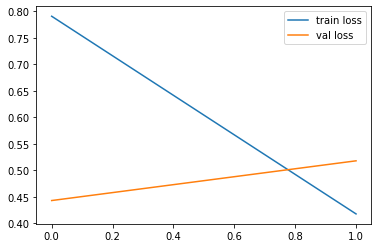

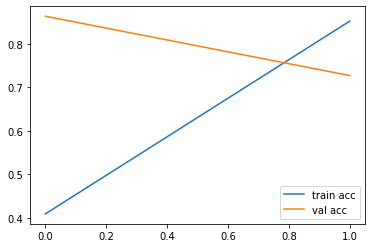

<Figure size 432x288 with 0 Axes>

In [81]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [104]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4192 - accuracy: 0.8750 - auc: 0.9296


[0.41918596625328064, 0.875, 0.9295652508735657]

Prediction on unknown individuals data

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xnew=[[1,0,1,0,2,0,5,3,3,0,0,1,5.0,0,5.0,5.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0],[0,1,1,1,0,1,4,0,1,1,0,1,1.0,1,3.0,3.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0],[0,0,2,2,2,1,2,2,3,3,0,2,2.0,3,4.0,2.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1],[1,0,0,0,2,2,5,1,1,1,0,1,3.0,1,1.0,5.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0],[0,0,1,1,2,3,4,0,2,2,0,1,1.0,1,4.0,5.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1],[1,0,1,2,2,0,2,2,3,0,0,3,1.0,1,2.0,5.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1]]
Xnew = scaler.fit_transform(Xnew)
 
ynew = model.predict(X)
print(ynew[0])
for i in range(data.shape[0]):
    print("X=%s, Predicted=%s" % (X[i], ynew[i]))

5/5 [==============================] - 0s 5ms/step
[0.9992883]
X=[-0.92906044 -0.60172167  0.22065873 -0.11853398  0.77100999  1.51578754
  0.48007914 -1.22904769  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700116 -0.39151586 -0.56273143
  0.77198419 -0.43355498  0.77198419 -0.52363494  1.16542222 -0.59196905
 -0.68041382 -0.21530819 -0.16116459 -0.16116459 -0.07980869 -0.07980869
 -0.25993762 -0.13912167 -0.1132277  -0.16116459 -0.07980869 -0.21530819
 -0.07980869 -0.4940592   1.7175564  -0.07980869 -0.45398995 -0.16116459
 -0.1132277  -0.23094011 -0.55297841 -0.68041382  1.10695624 -0.21530819
  0.39151586 -0.31180478 -0.35856858  0.96271972 -0.76157731 -0.52363494
  1.06542721 -0.68041382 -0.71046598 -0.50395263  1.07906606], Predicted=[0.9992883]
X=[ 0.97732332 -0.60172167  0.22065873 -0.11853398 -1.82089593 -0.72247818
 -1.16888835  1.05553508  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700

In [109]:
for i in range(6):
    if((ynew[i])>0.5):
        print('Depressed')
    else:
        print('Happy')

Depressed
Depressed
Happy
Depressed
Happy
Depressed


In [74]:
predicted=[]
for i in range(data.shape[0]):
    if ynew[i]>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [110]:
test_labels=y
cm = confusion_matrix(y_true=test_labels, y_pred=predicted)

In [111]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [112]:
cm_plot_labels = ['Depressed','Happy']




Confusion matrix, without normalization
[[71  6]
 [ 4 77]]


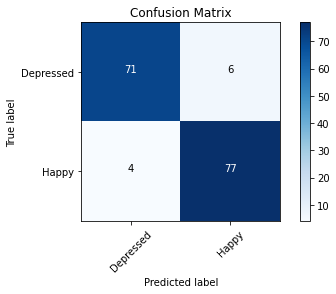

In [114]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [139]:
import tensorflow as tf

In [141]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model= converter.convert()

with open("Ann.tflite", 'wb') as f:
  f.write(tflite_model)

In [142]:
# Save whole model for download
model.save("model.h5")

In [1]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'

2022-11-15 09:09:06.740723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 09:09:07.098516: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 09:09:09.207185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-15 09:09:09.207498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinf